In [34]:
#imports to prepare environment

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
from kmodes.kmodes import KModes

#wrangle files
import wrangle

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#checking the wrangle.py file 
df = wrangle.acquire_prep()
df.head(3)

,zodiac,born,race,ethnic,age,sex,sexornt,marital,martype,paocc10,...,socbar,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5
0,pisces,yes,white,italy,65.00,female,heterosexual or straight,married,unknown,"dredge, excavating, and loading machine operators",...,unknown,unknown,unknown,unknown,fair,middle class,more or less satisfied,good,1 partner,1 partner
1,pisces,yes,white,england and wales,60.00,male,unknown,divorced,unknown,chief executives,...,several times a month,several times a year,once or twice a week,several times a month,very good,upper class,pretty well satisfied,excellent,unknown,unknown
5,aries,yes,black,299.00,33.00,female,unknown,never married,unknown,retail salespersons,...,about once a month,about once a month,about once a month,about once a month,good,middle class,pretty well satisfied,good,unknown,unknown


In [3]:
#bringing in split function and looking at the shape of data:
train, validate, test = wrangle.split(df)

Train: 2499 rows, 72 cols
Validate: 625 rows, 72 cols
Test: 552 rows, 72 cols


In [4]:
# Count of observations in the data
print(pd.Series({"Number of observations in the training set": len(train),
                 "Number of observations in the test set": len(test)}).to_string())

Number of observations in the training set    2499
Number of observations in the test set         552


In [5]:
# Number of unique values in the training set columns
train.nunique()

zodiac      12
born         3
race         4
ethnic      83
age         73
            ..
class        5
satfin       4
quallife     6
partners    10
partnrs5    11
Length: 72, dtype: int64

### Creating some visuals of data:

In [6]:
#creating some groups to view of data:
train_demo = train[['zodiac','born','race','ethnic','age','sex','sexornt']]

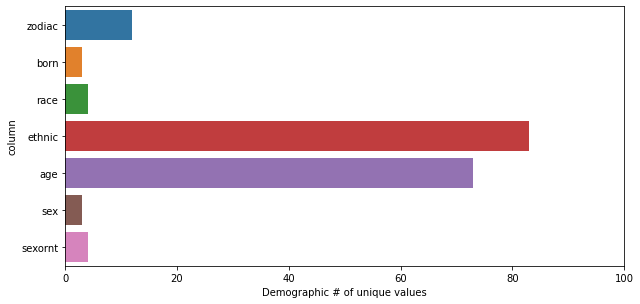

In [7]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view = train_demo.nunique()
s = sns.barplot(x = train_view.values, y = train_view.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Demographic # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [8]:
#group by relationships/family
train_rel = train[['marital','martype','paocc10','maocc10','res16','reg16','class']]

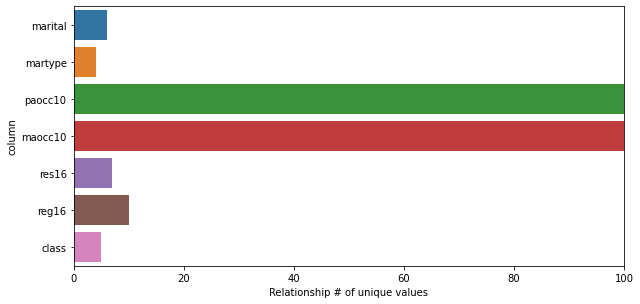

In [9]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view2 = train_rel.nunique()
s = sns.barplot(x = train_view2.values, y = train_view2.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Relationship # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

Interesting to note that for mother and father occupations, there are the most unique counts

In [10]:
#group by work and career
train_work = train[['income','wrkslf','satjob','occ10','degree']]

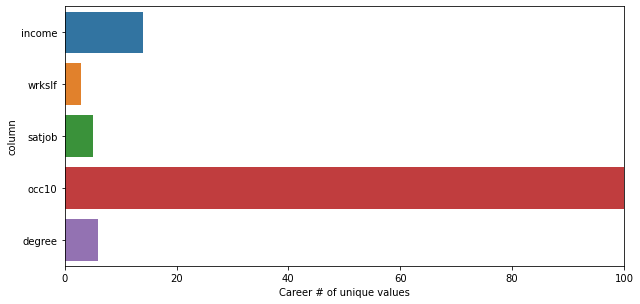

In [11]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view3 = train_work.nunique()
s = sns.barplot(x = train_view3.values, y = train_view3.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Career # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [12]:
#group by religion and spiritual
train_sprt = train[['relidesc','relig','postlifev','postlifenv','sprtprsn','sprtconnct',
                    'sprtlrgr','sprtpurp'
                   ]]

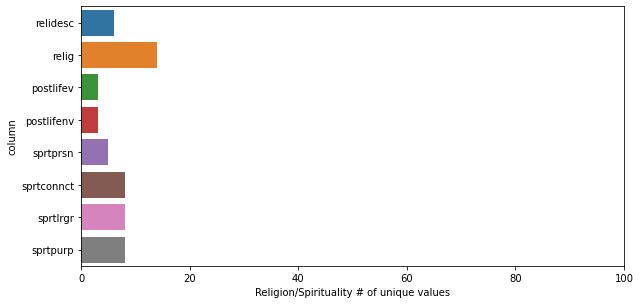

In [13]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view4 = train_sprt.nunique()
s = sns.barplot(x = train_view4.values, y = train_view4.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Religion/Spirituality # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [14]:
#group by opinions
train_opin = train[['fairv','fairnv','helpfulv','helpfulnv','trustv','trustnv',
                    'conmedic','contv','conpress','consci','conjudge','conlegis','happy',
                    'life','obey','popular','thnkself','workhard','helpoth','grtwrks','freemind'
                   ]]

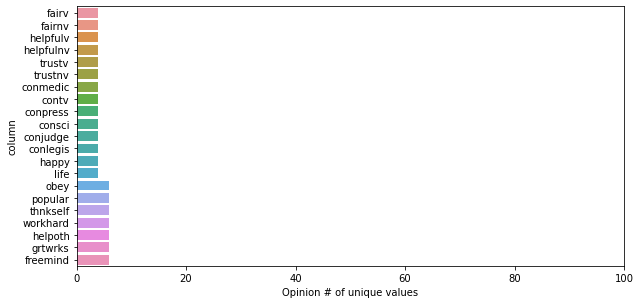

In [15]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view5 = train_opin.nunique()
s = sns.barplot(x = train_view5.values, y = train_view5.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Opinion # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [16]:
#reminder of column names for reference:
train.columns

Index(['zodiac', 'born', 'race', 'ethnic', 'age', 'sex', 'sexornt', 'marital',
       'martype', 'paocc10', 'maocc10', 'res16', 'reg16', 'degree', 'income',
       'wrkslf', 'satjob', 'occ10', 'partyid', 'if16who', 'polviews', 'gunlaw',
       'grassv', 'relidesc', 'relig', 'postlifev', 'postlifenv', 'sprtprsn',
       'sprtconnct', 'sprtlrgr', 'sprtpurp', 'happy', 'life', 'obey',
       'popular', 'thnkself', 'workhard', 'helpoth', 'grtwrks', 'freemind',
       'decevidc', 'advfmsci', 'mditate1', 'health', 'hlthphys', 'hlthmntl',
       'enjoynat', 'eatmeat', 'recycle', 'nobuygrn', 'fairv', 'fairnv',
       'helpfulv', 'helpfulnv', 'trustv', 'trustnv', 'conmedic', 'contv',
       'conpress', 'consci', 'conjudge', 'conlegis', 'socbar', 'socrel',
       'socommun', 'socfrend', 'satsoc', 'class', 'satfin', 'quallife',
       'partners', 'partnrs5'],
      dtype='object')

Zodiac Count:

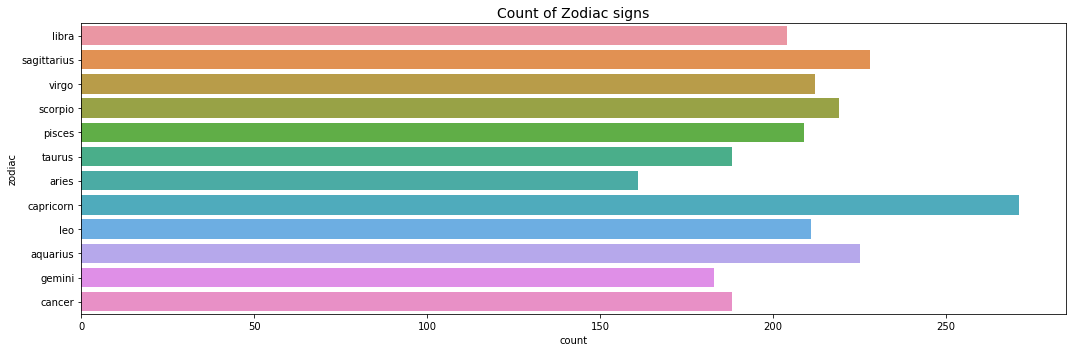

In [17]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'zodiac')
plt.title(f"Count of Zodiac signs", fontsize = 14)
plt.tight_layout()
plt.show()

Relationship Status:

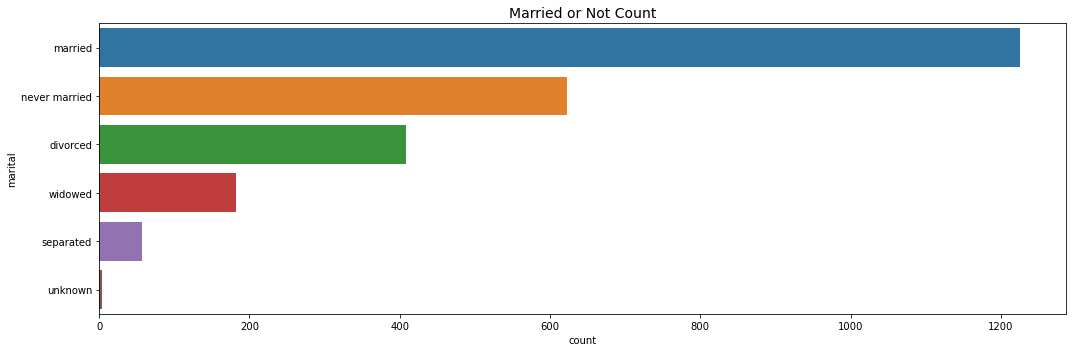

In [18]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'marital')
plt.title(f"Married or Not Count", fontsize = 14)
plt.tight_layout()
plt.show()

Gender:

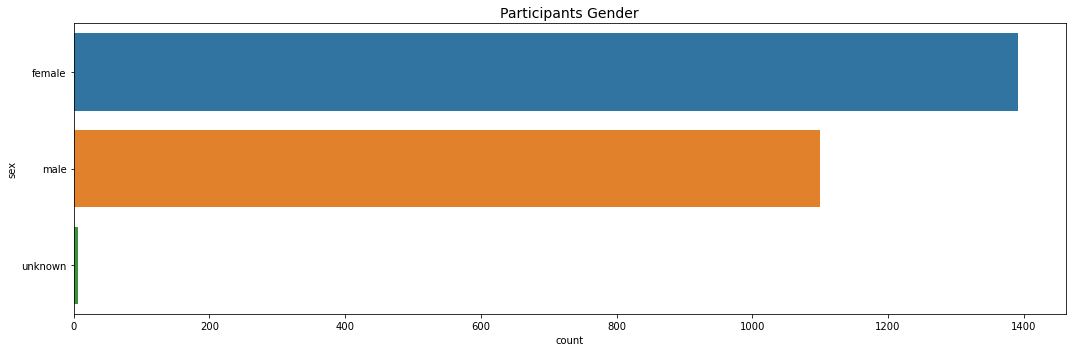

In [19]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'sex')
plt.title(f"Participants Gender", fontsize = 14)
plt.tight_layout()
plt.show()

Sexual Orientation:

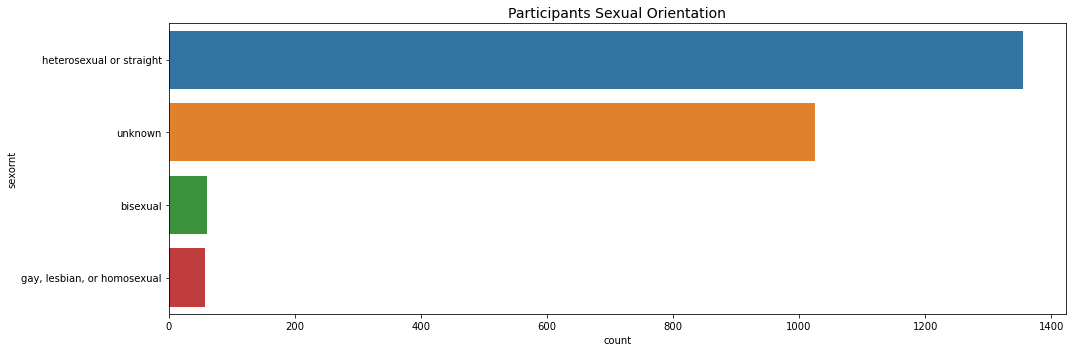

In [20]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'sexornt')
plt.title(f"Participants Sexual Orientation", fontsize = 14)
plt.tight_layout()
plt.show()

Age of Participants: NOTE-will be making bins for this one!

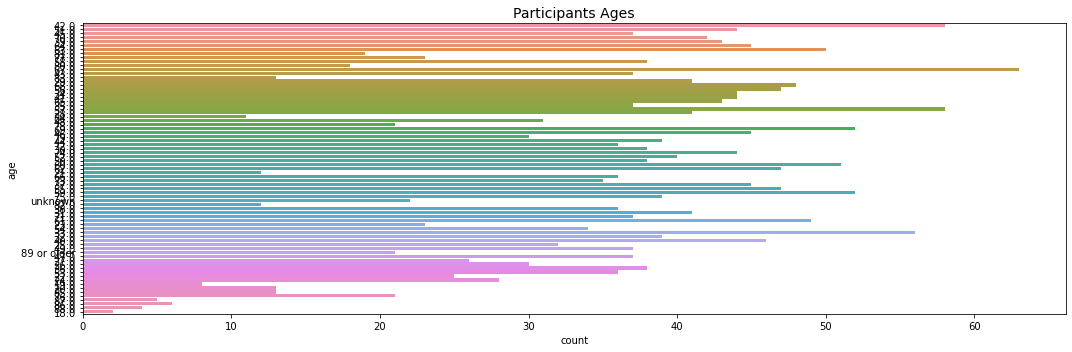

In [21]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'age')
plt.title(f"Participants Ages", fontsize = 14)
plt.tight_layout()
plt.show()

In [24]:
train.age.value_counts().max()

63

In [25]:
train.age.describe(include = ['O'])

count                2,499.00
unique                  73.00
top                     67.00
freq                    63.00
Name: age, dtype: float64

Religion of Participants:

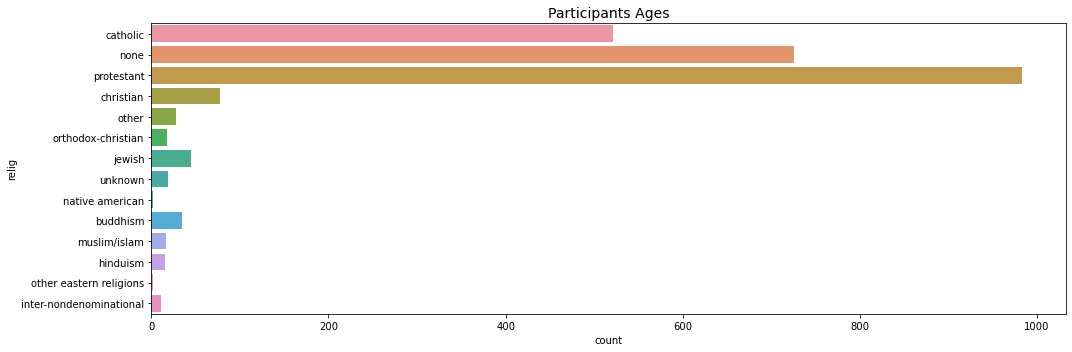

In [36]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'relig')
plt.title(f"Participants Ages", fontsize = 14)
plt.tight_layout()
plt.show()

Creating a loop function to iterate this for each variable:

In [41]:
def variable_count(df):
    columns = df.columns
    for col in columns:
        plt.figure(figsize = (15,  5))
        sns.countplot(data = df, y = col)
        plt.tight_layout()
        plt.show()

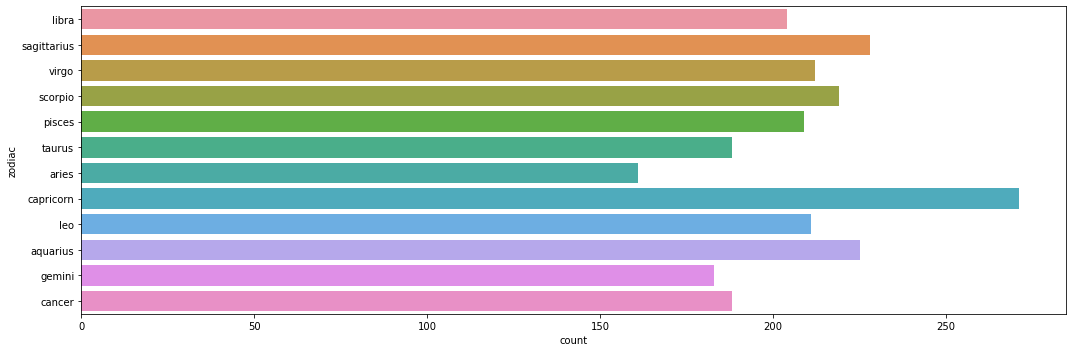

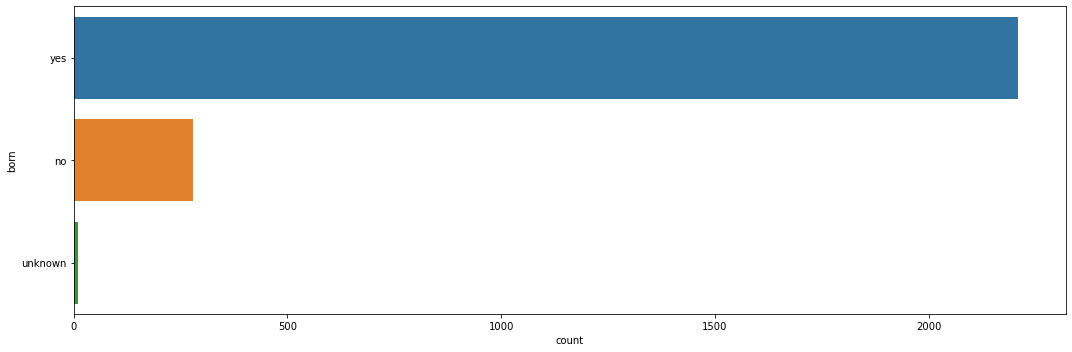

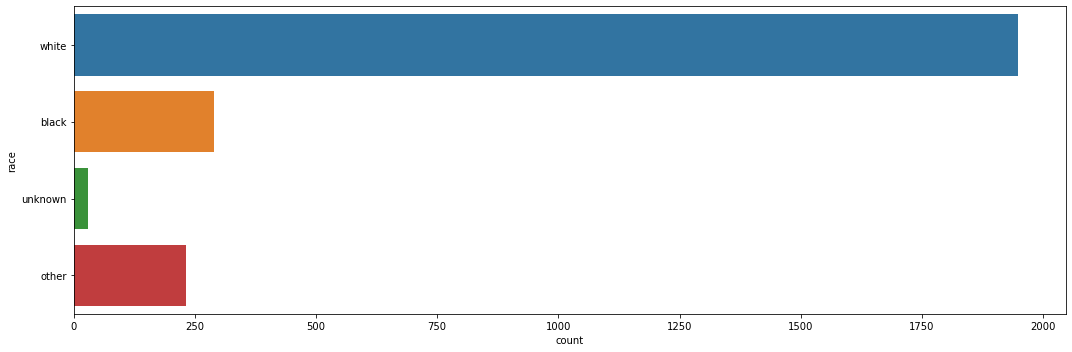

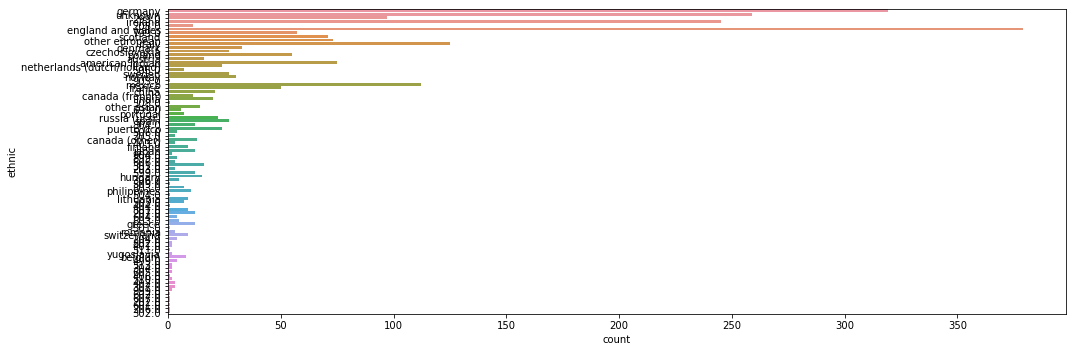

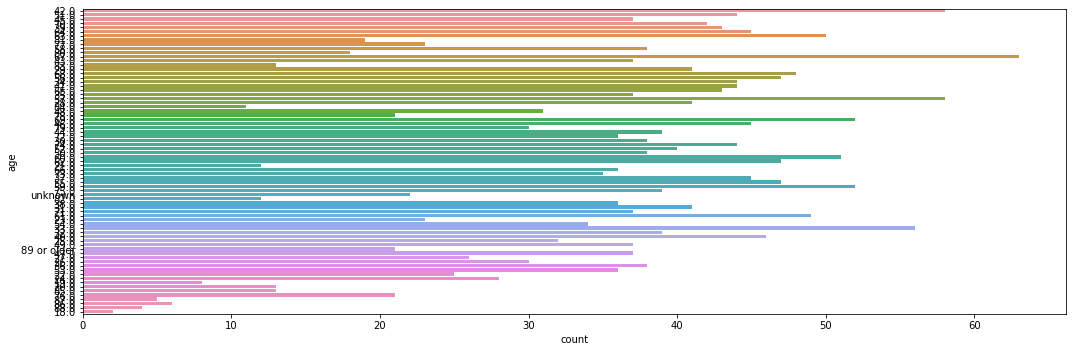

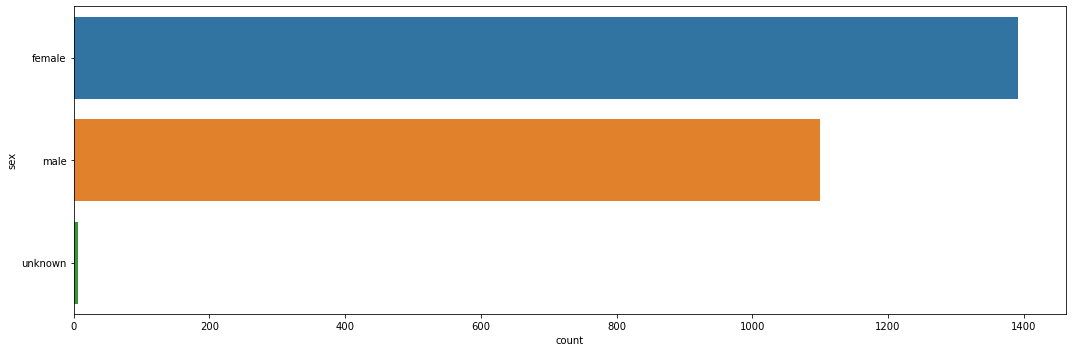

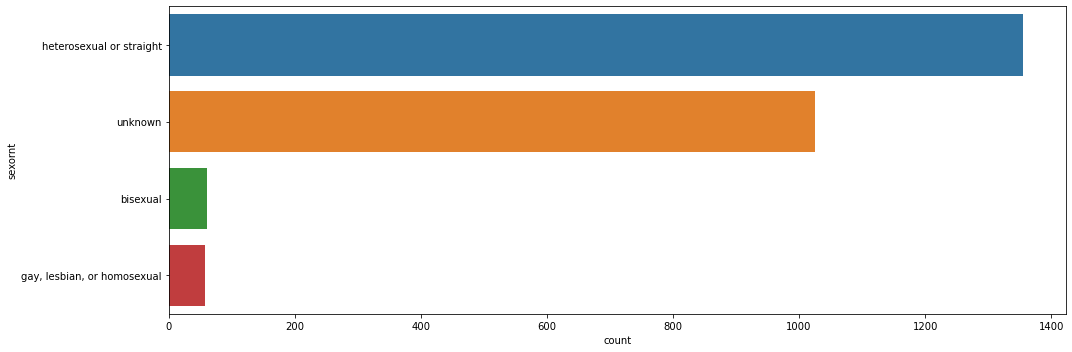

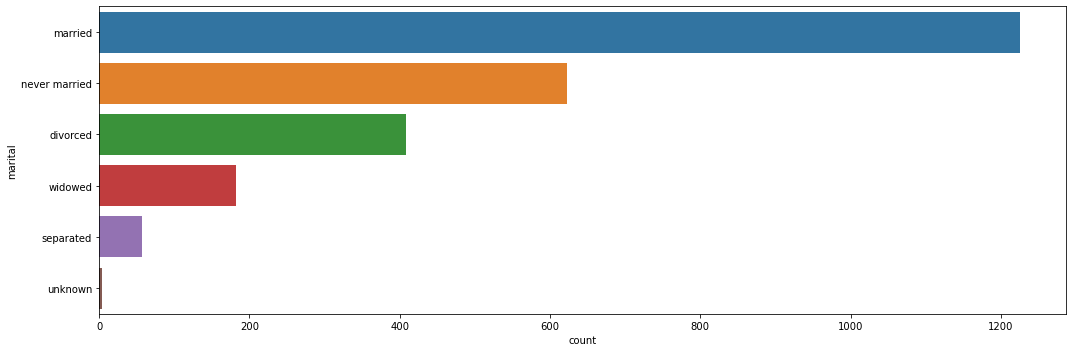

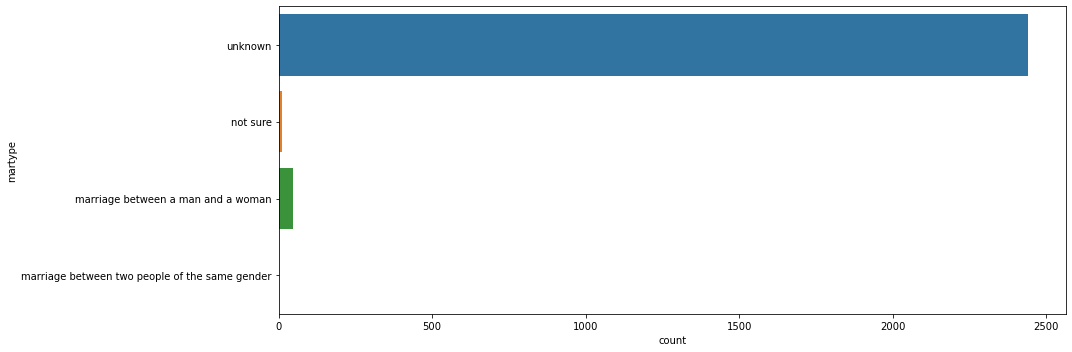

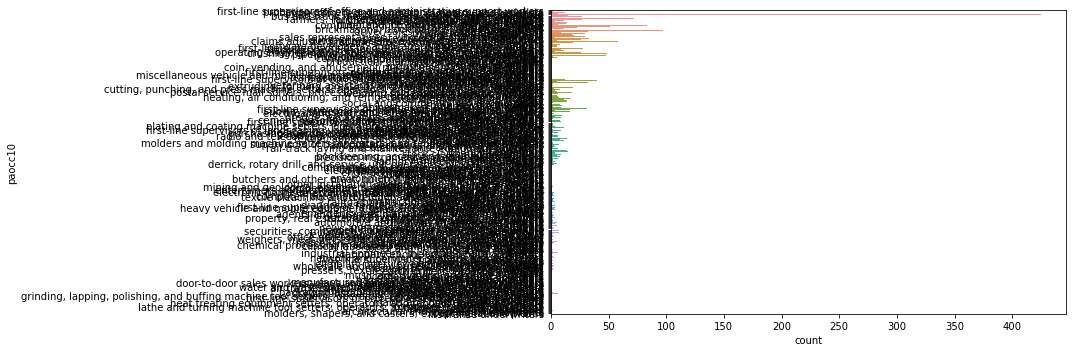

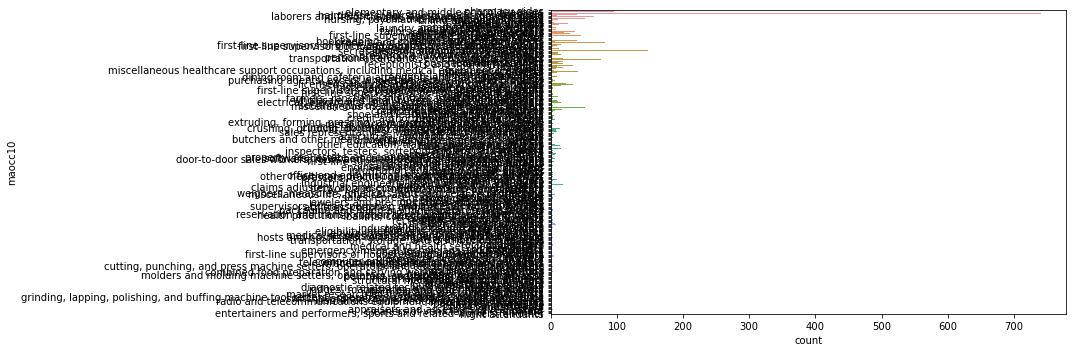

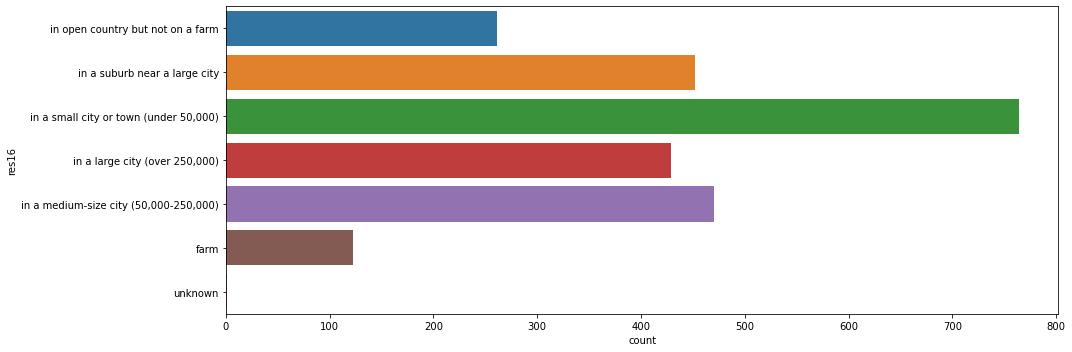

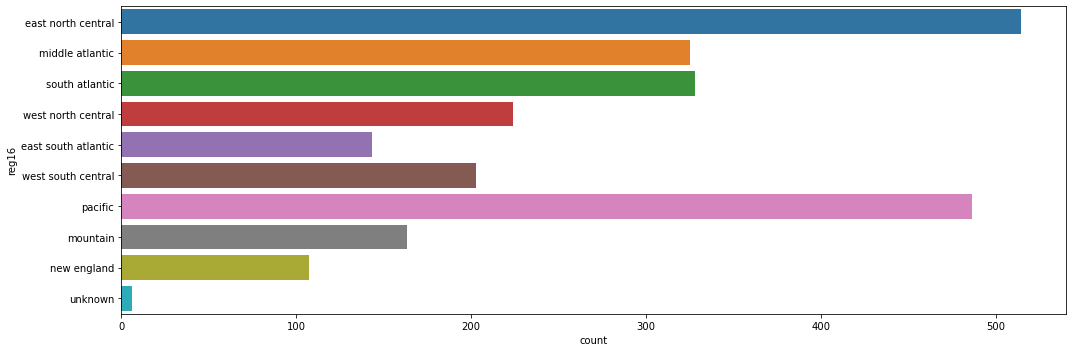

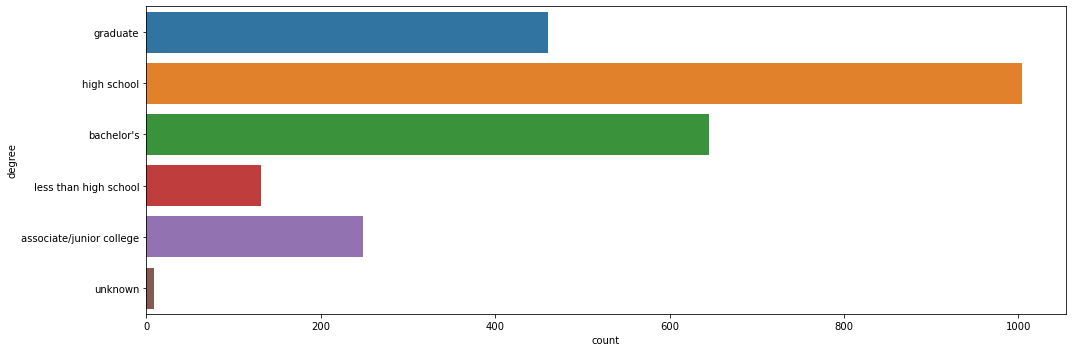

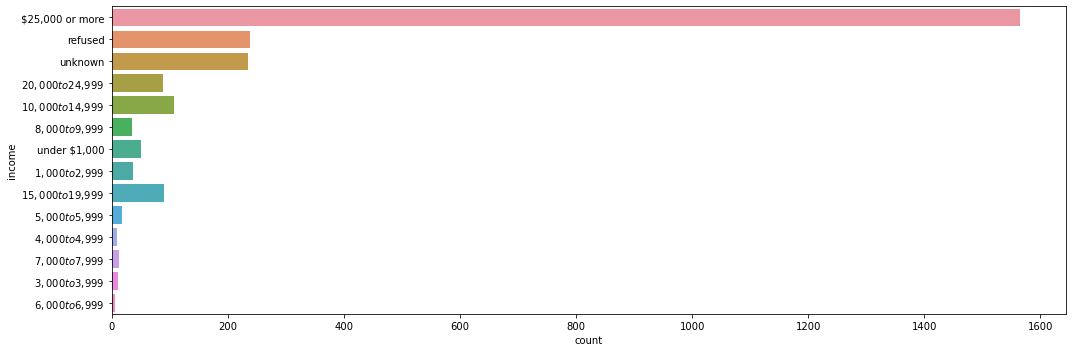

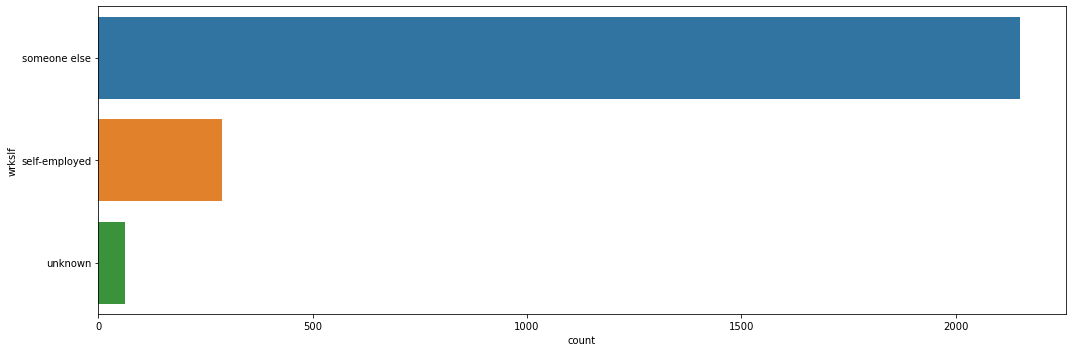

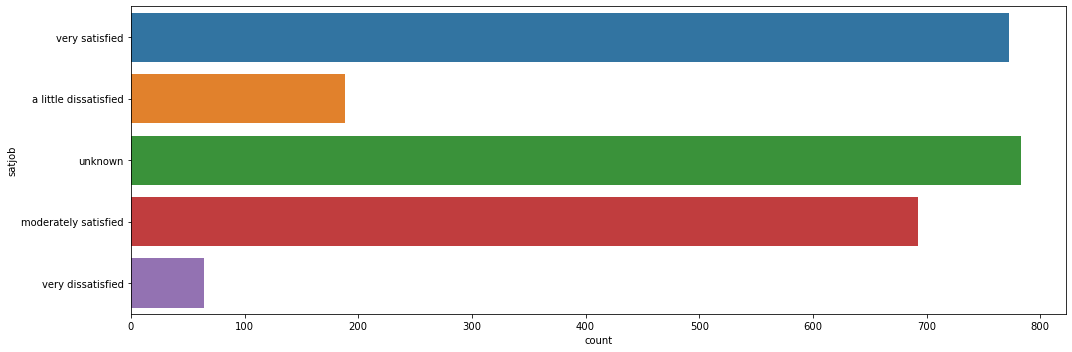

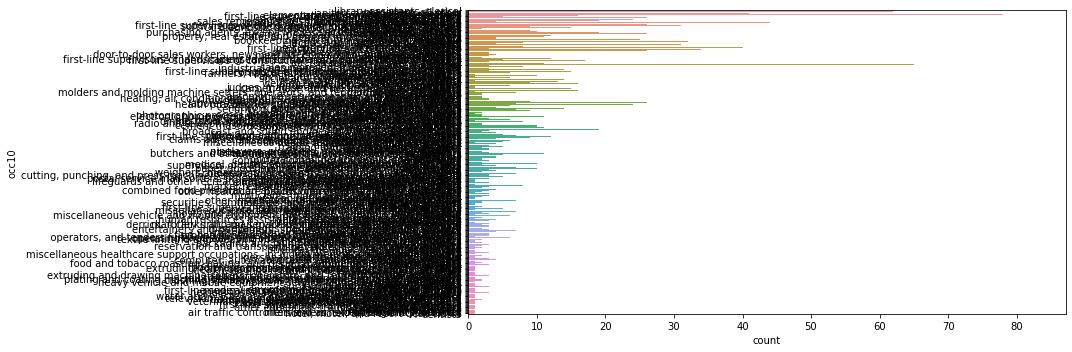

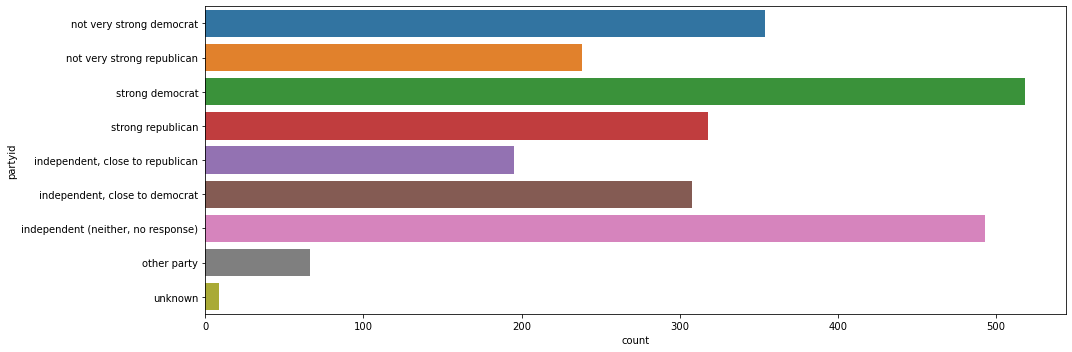

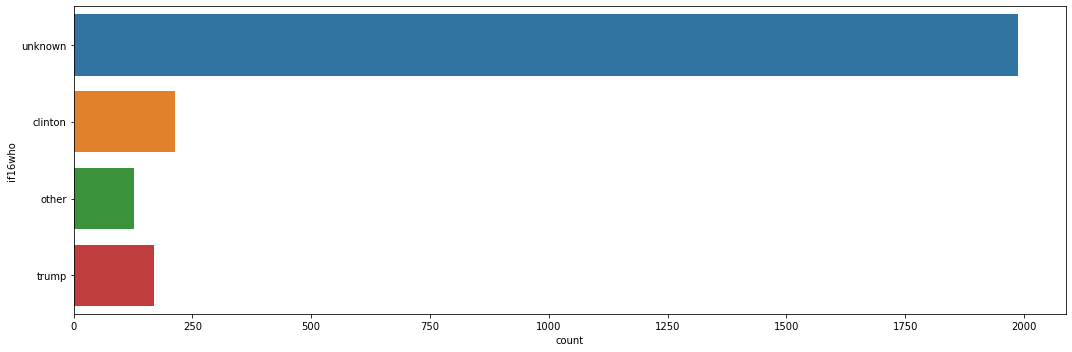

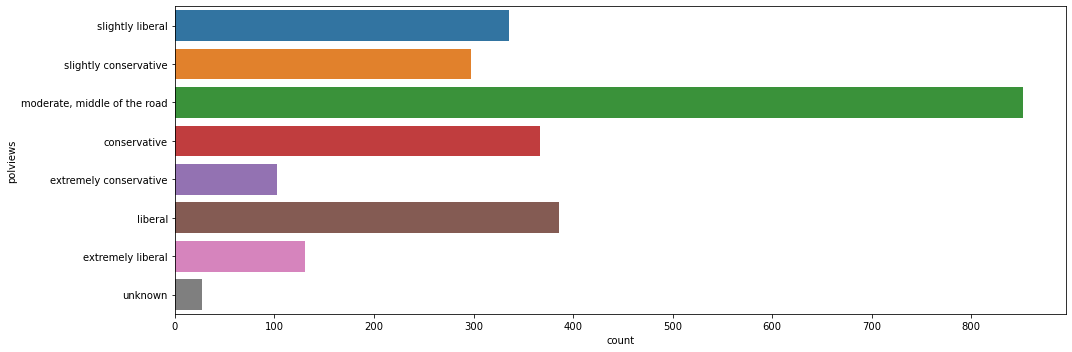

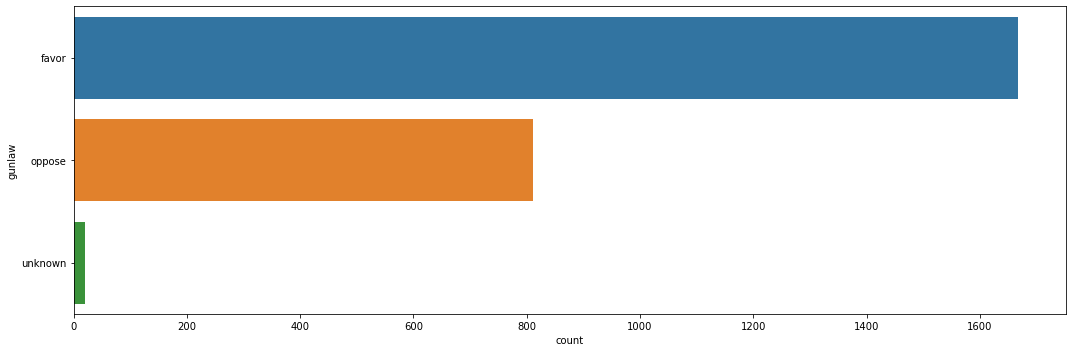

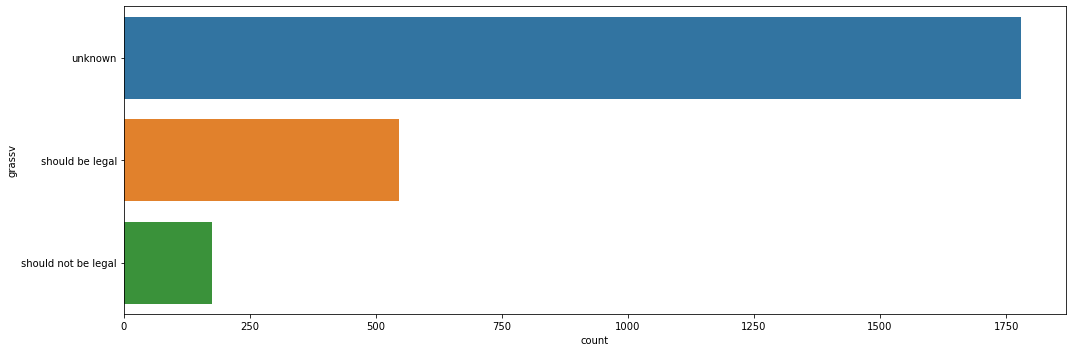

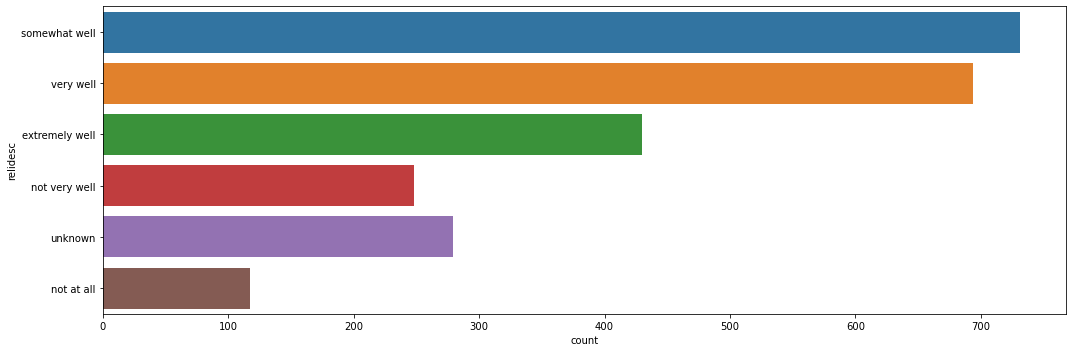

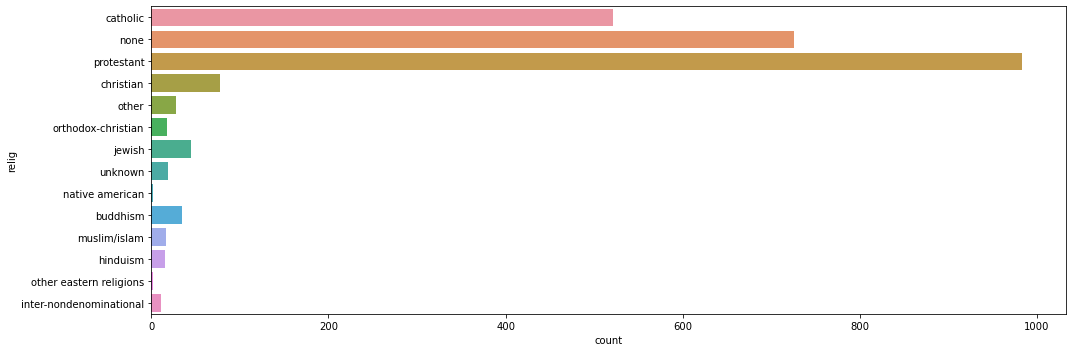

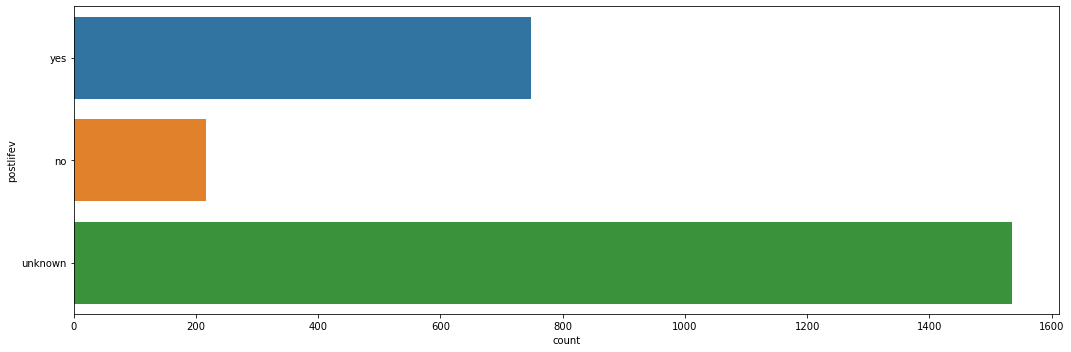

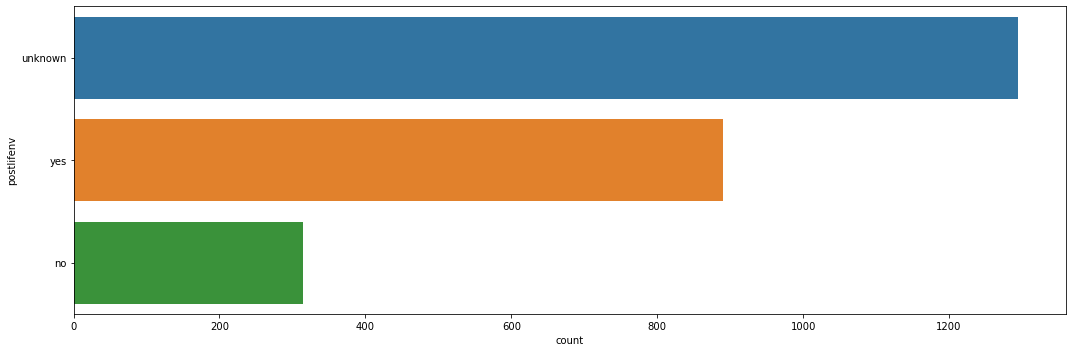

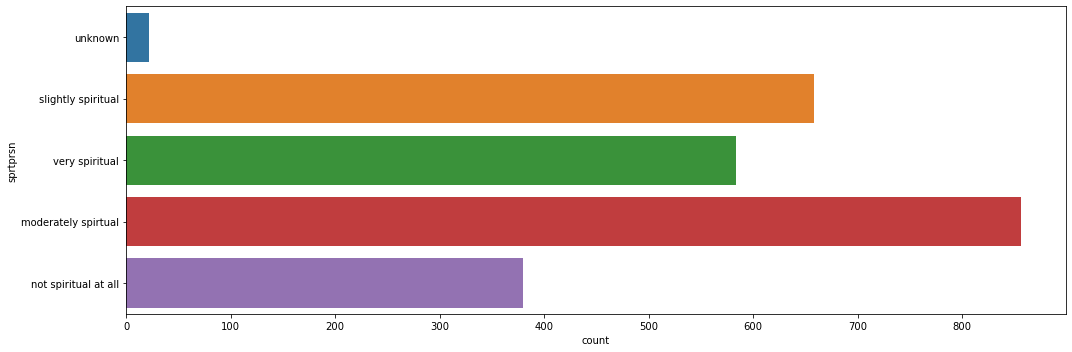

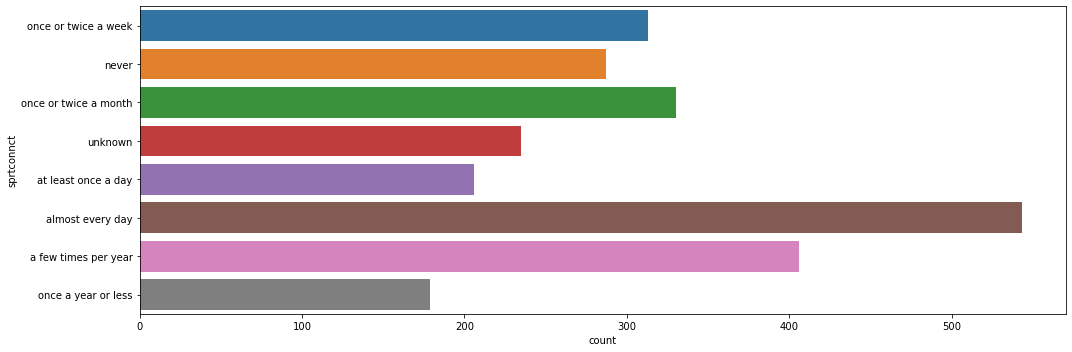

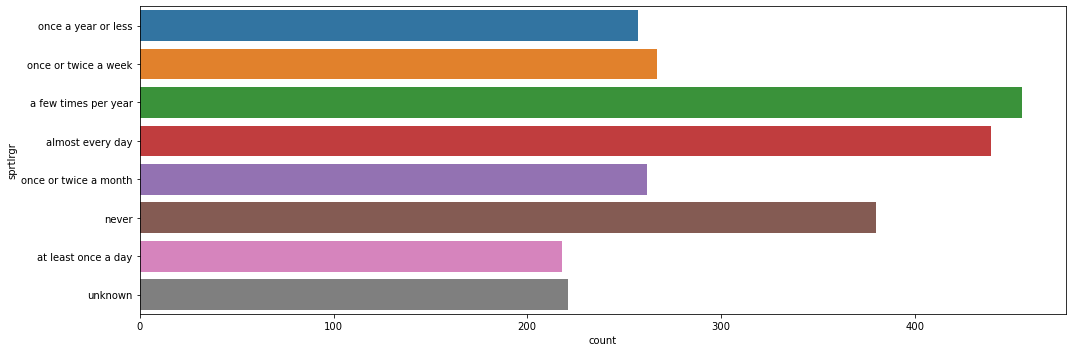

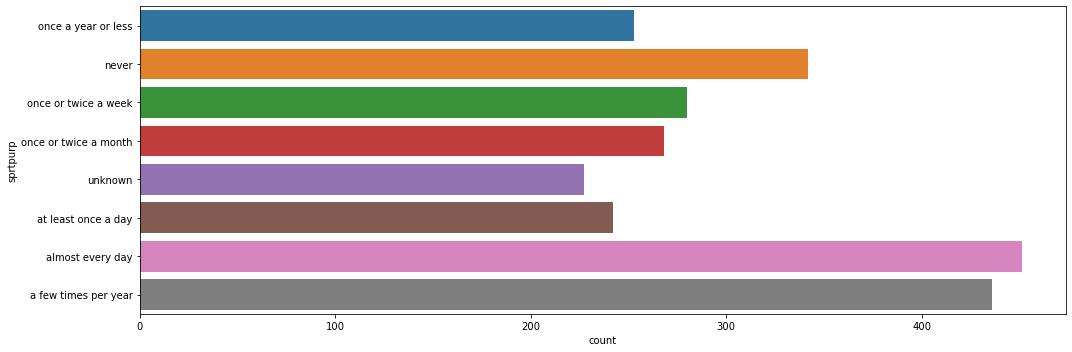

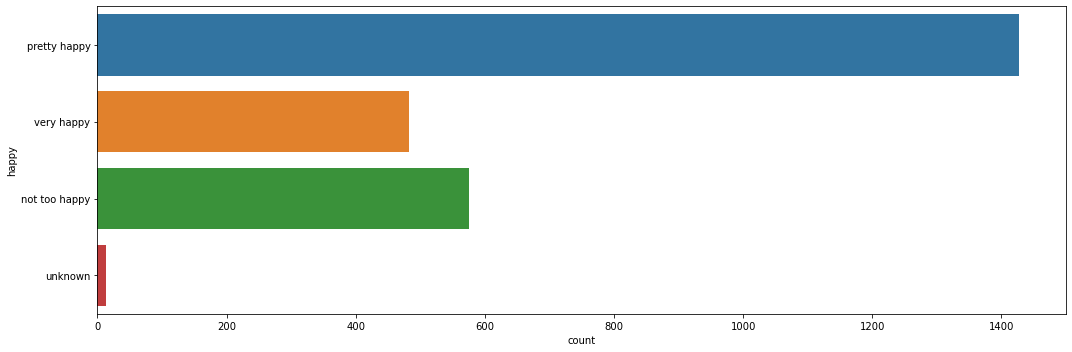

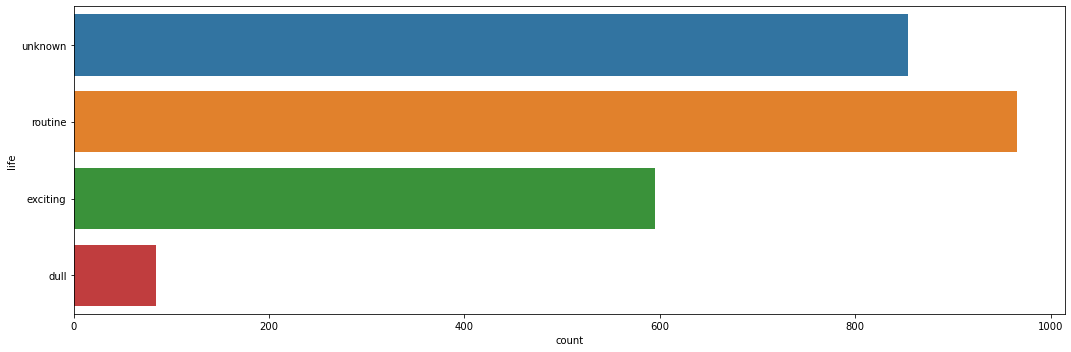

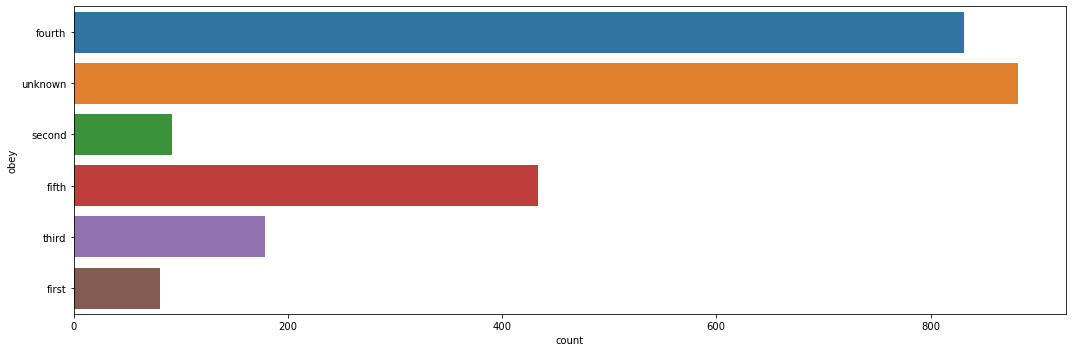

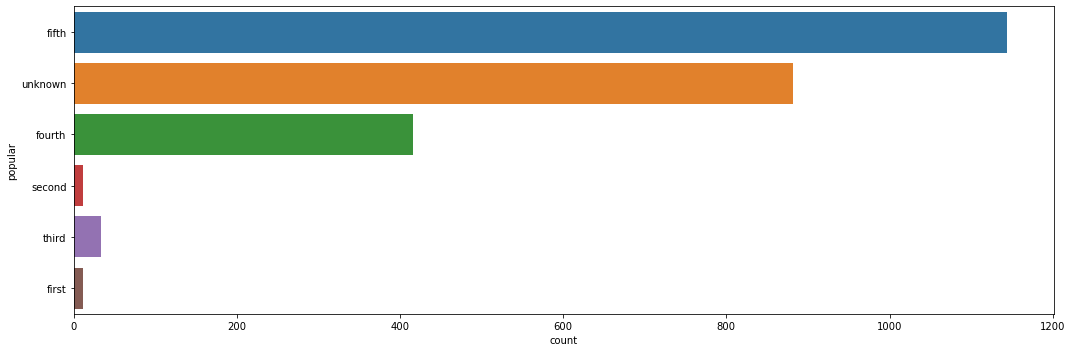

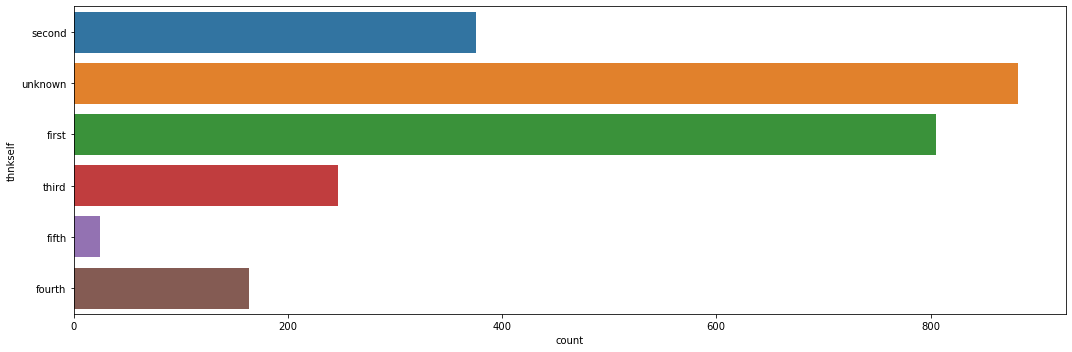

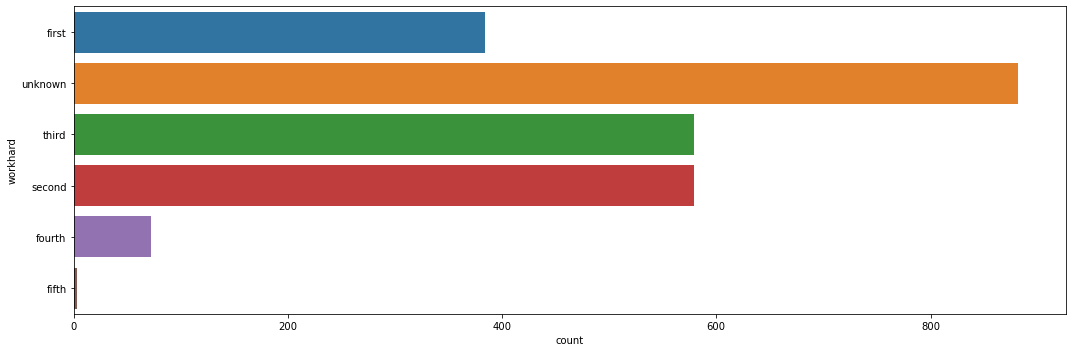

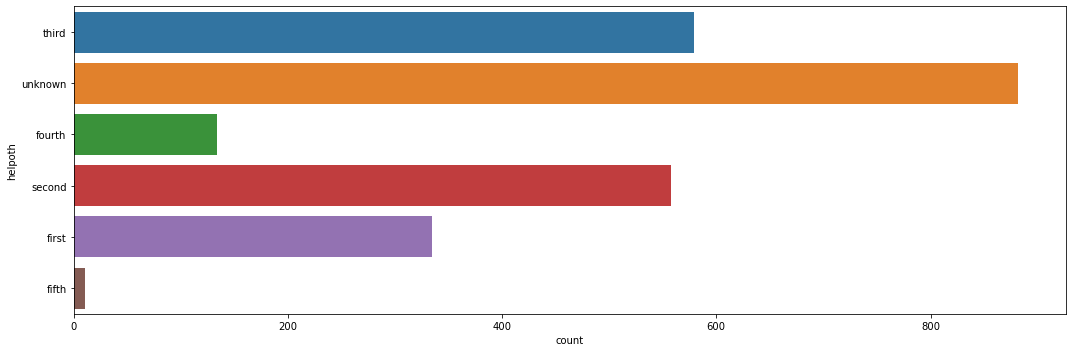

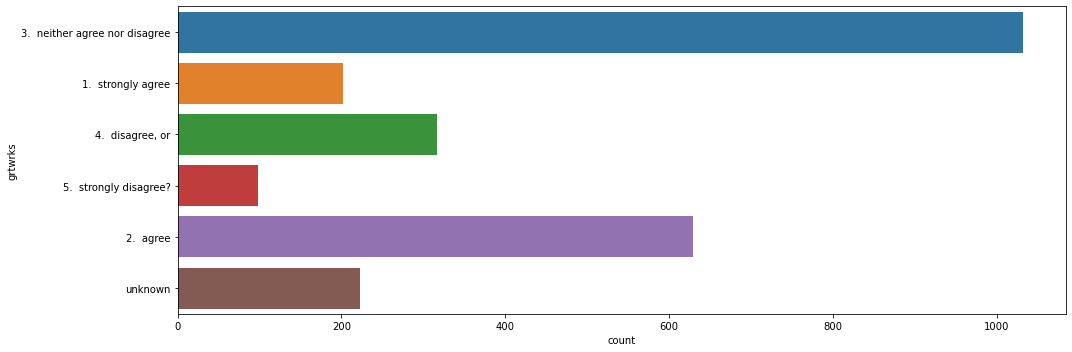

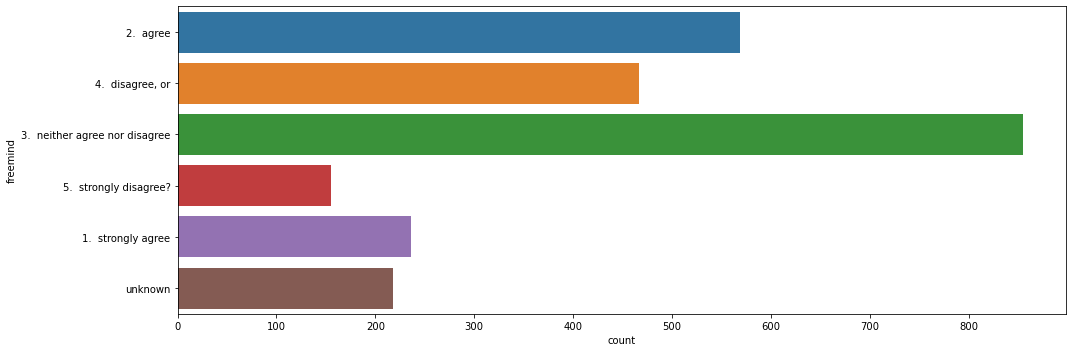

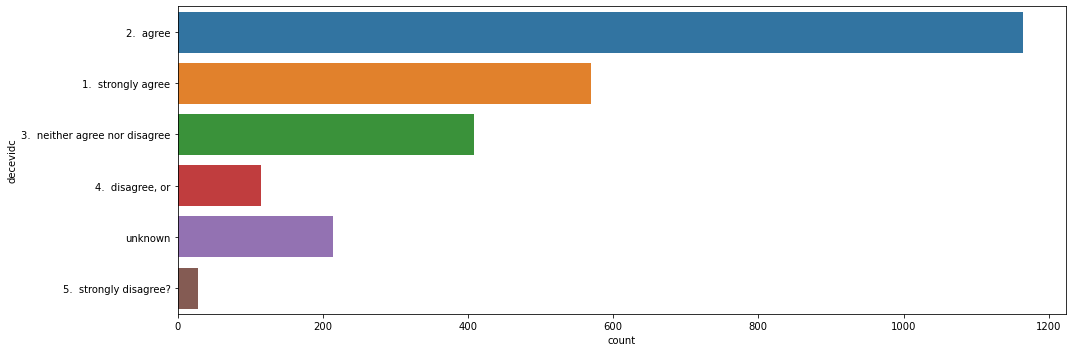

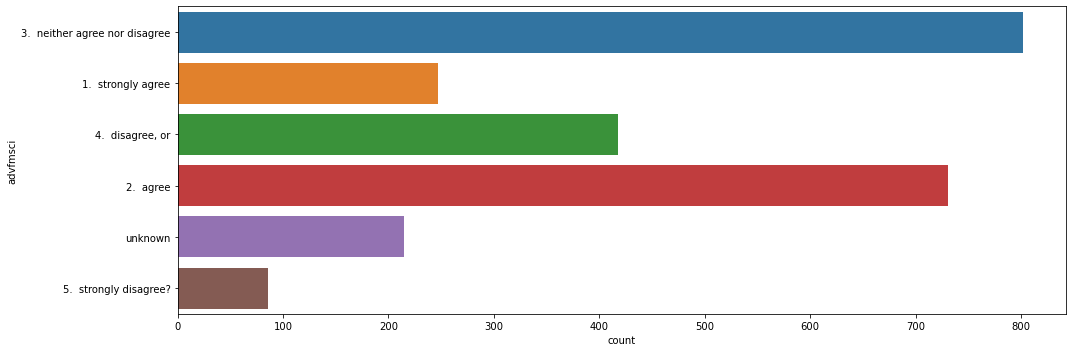

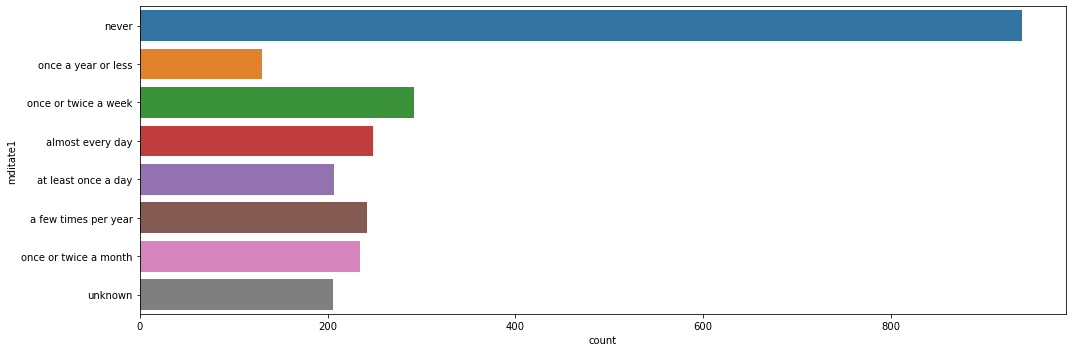

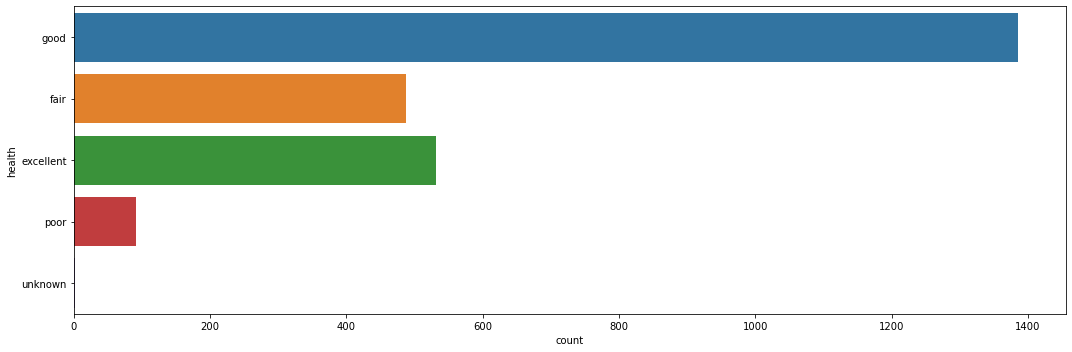

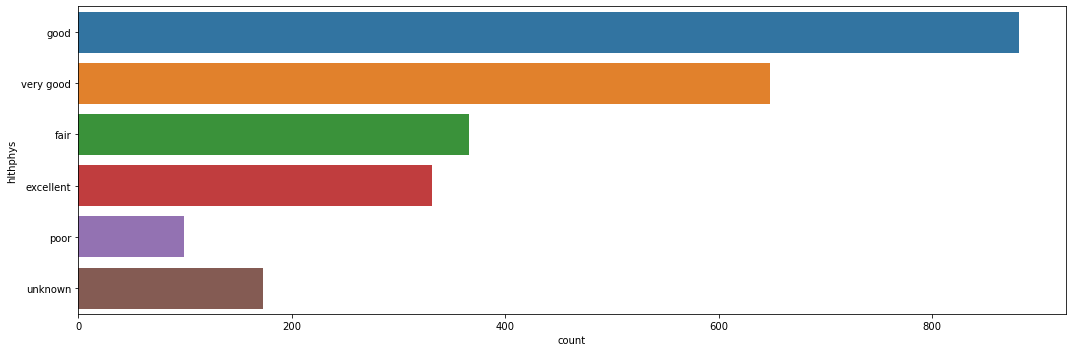

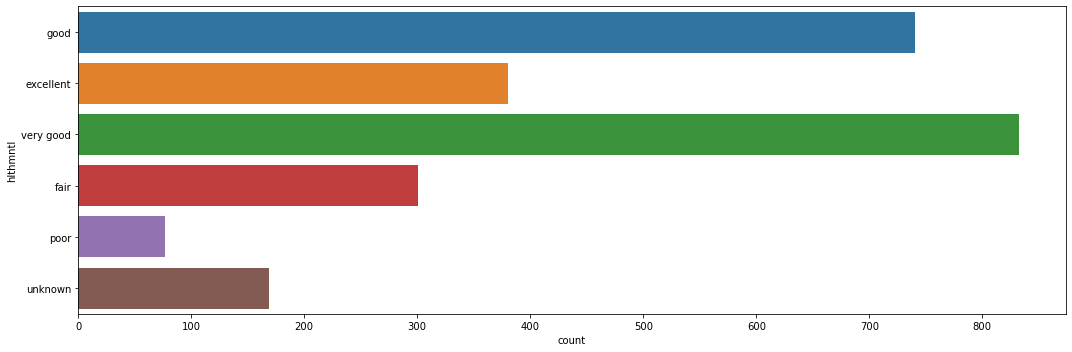

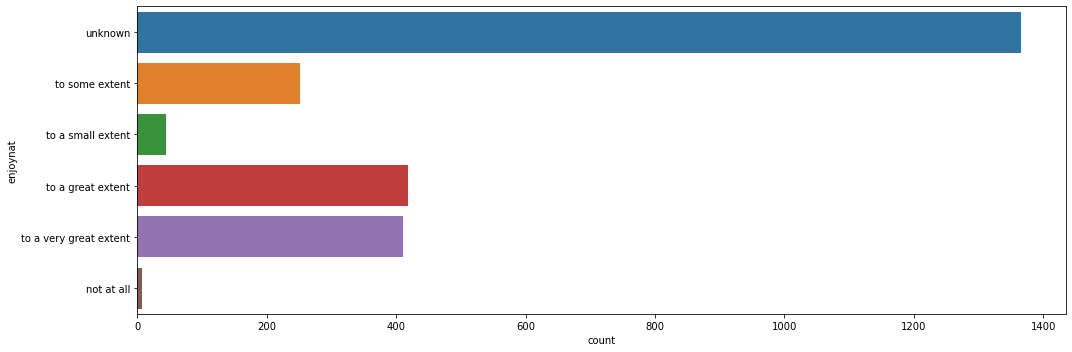

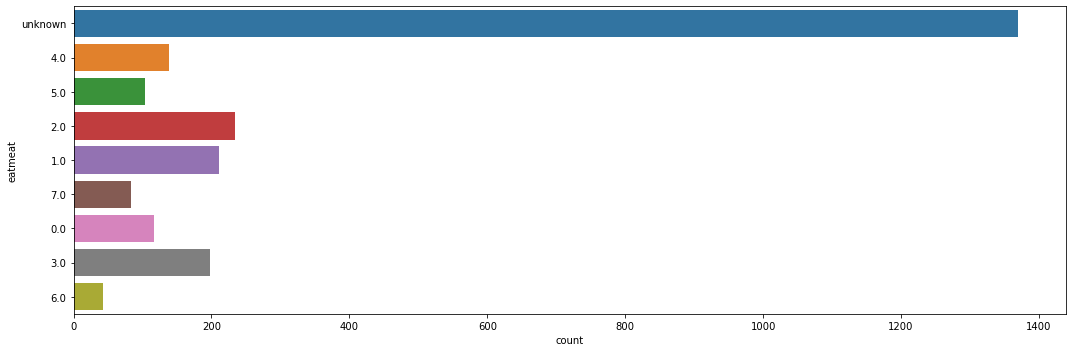

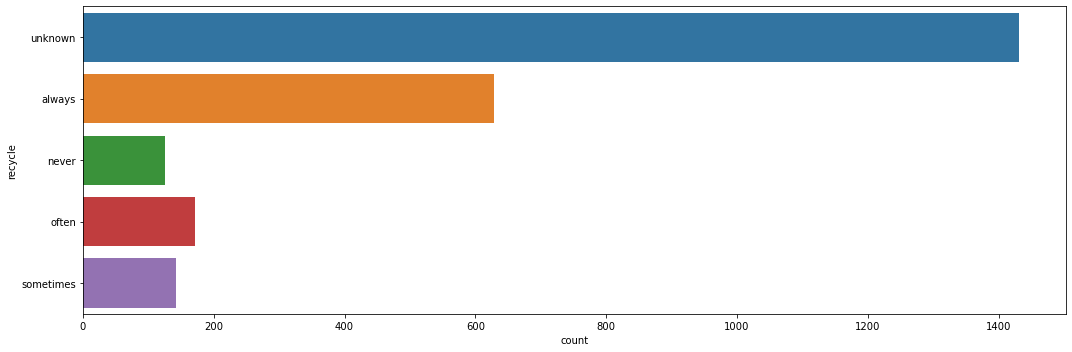

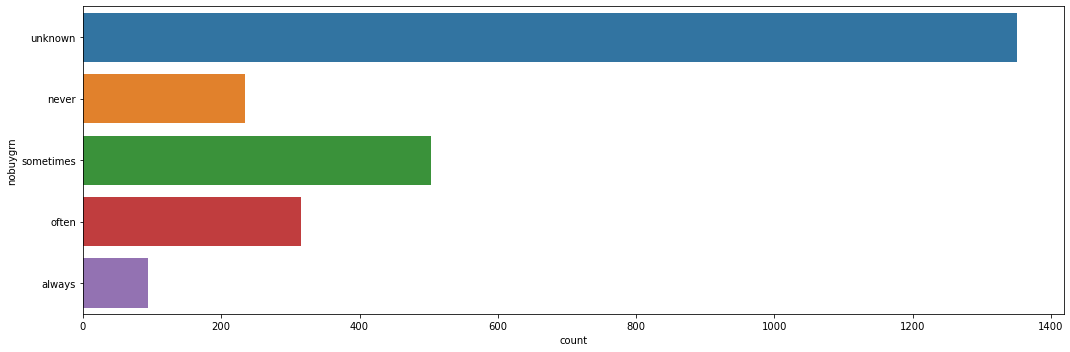

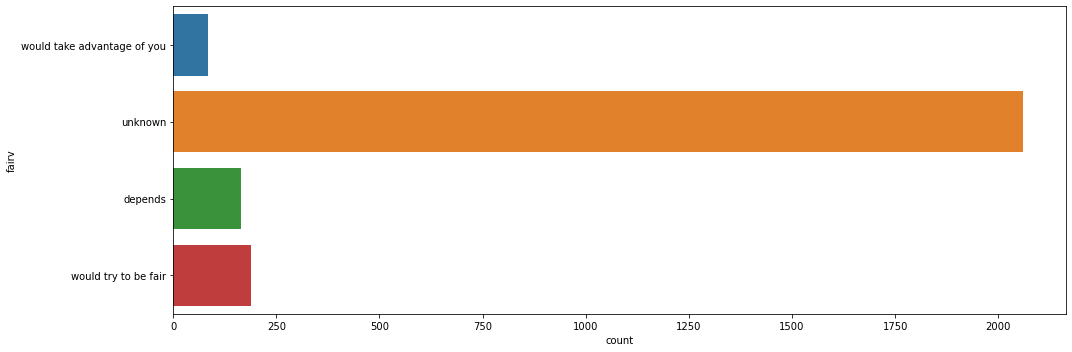

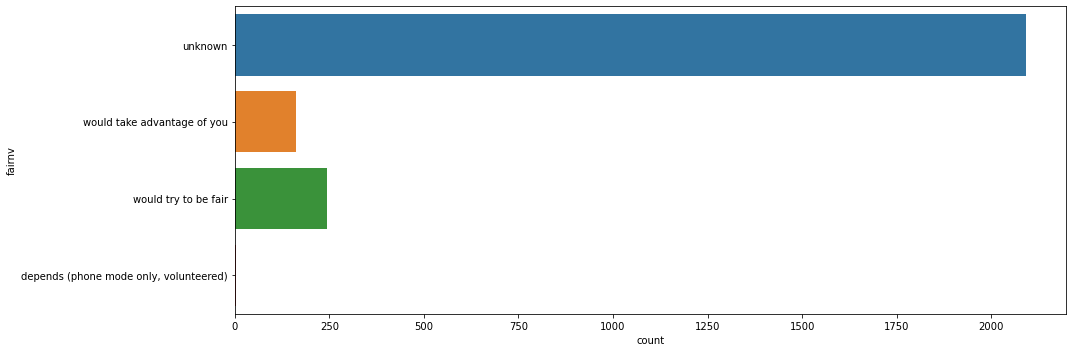

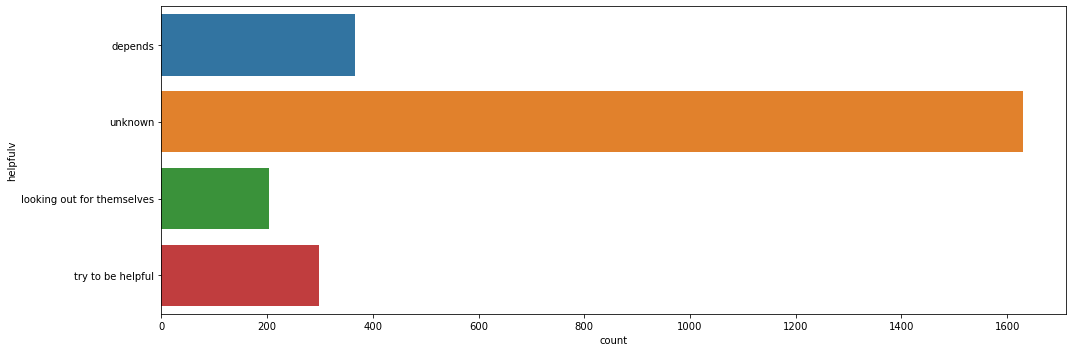

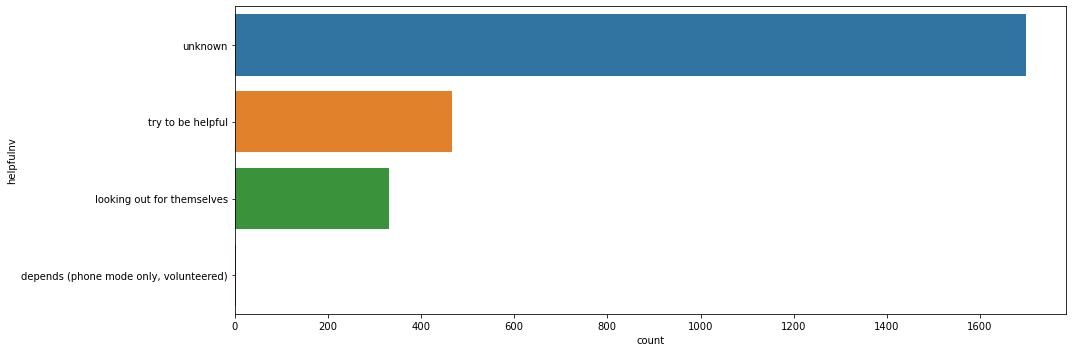

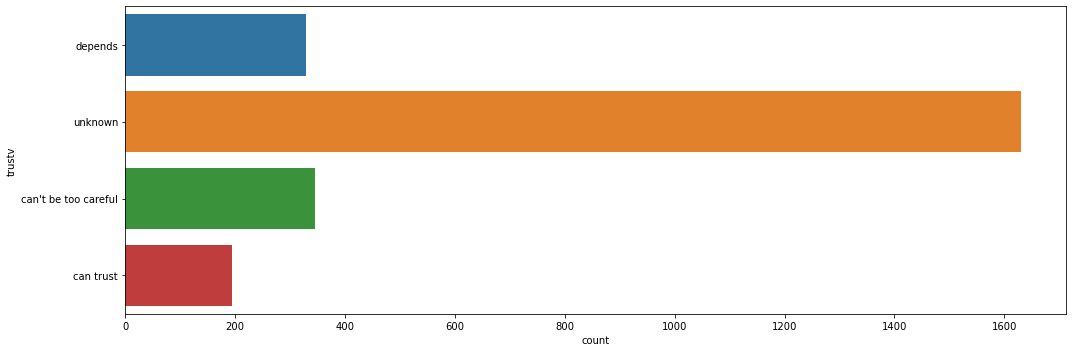

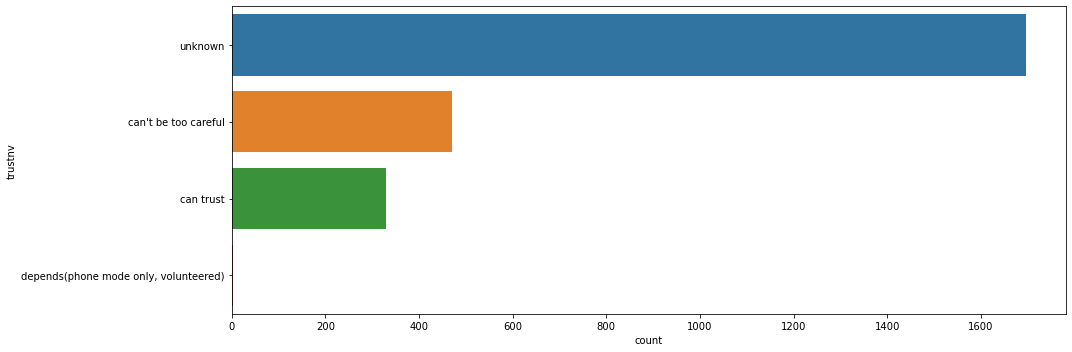

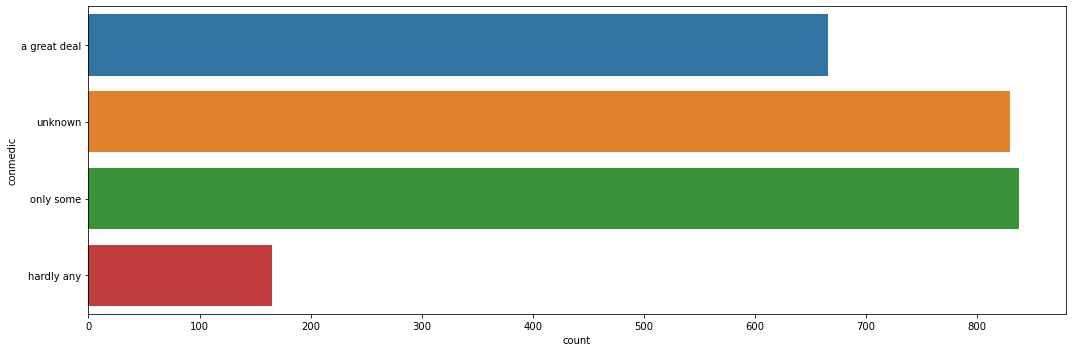

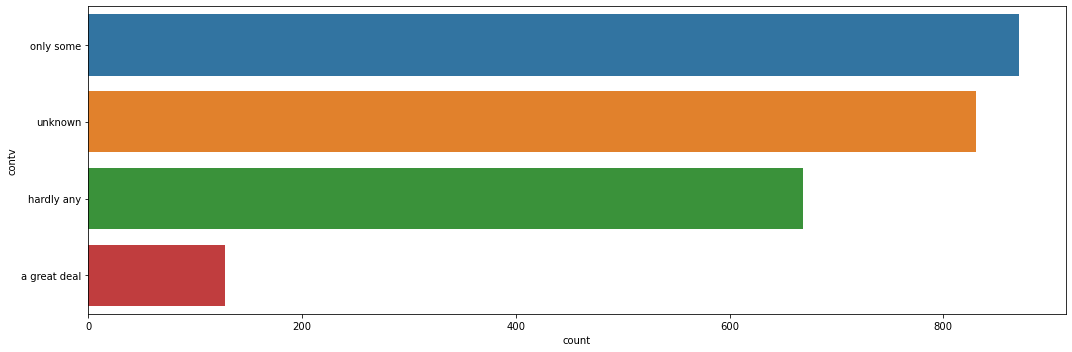

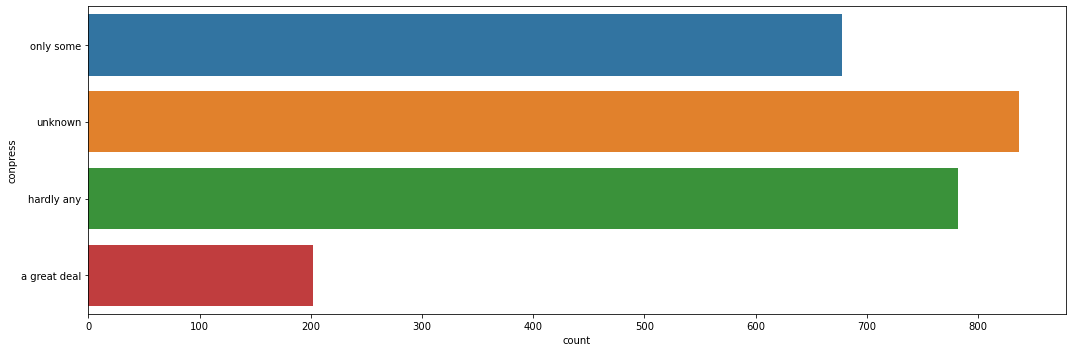

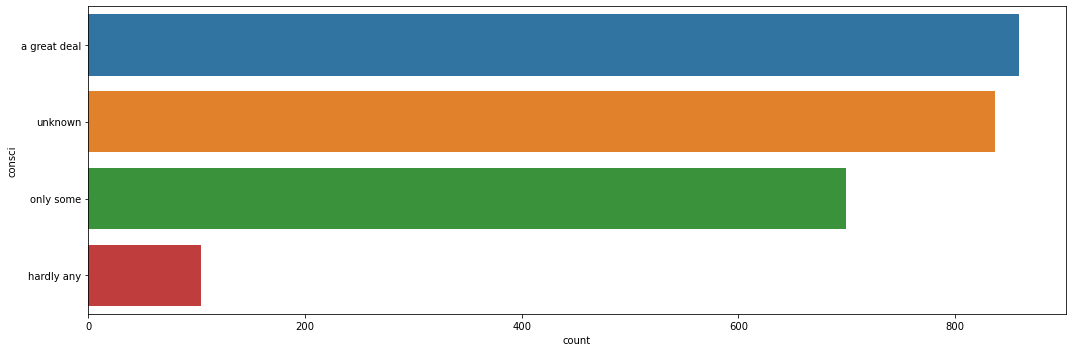

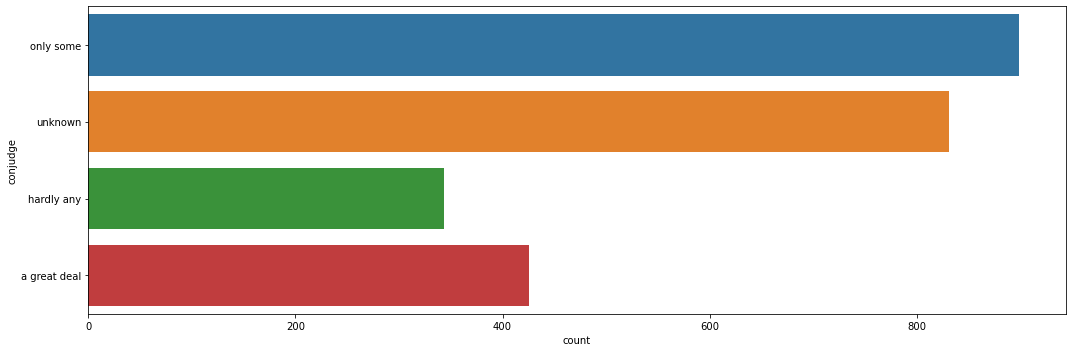

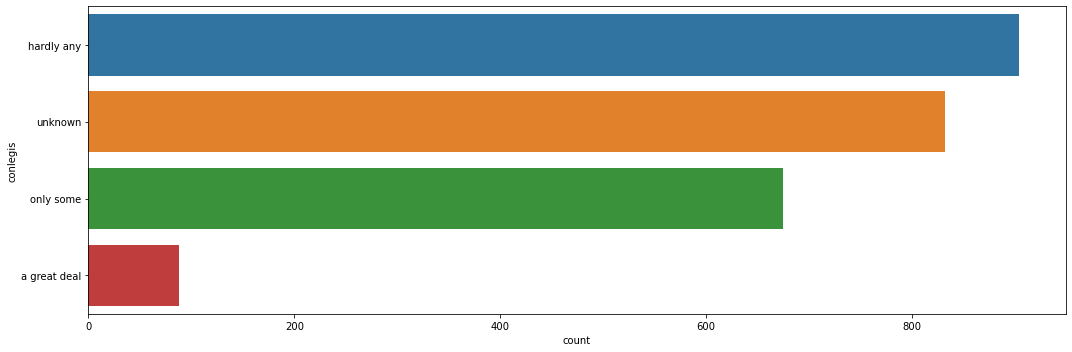

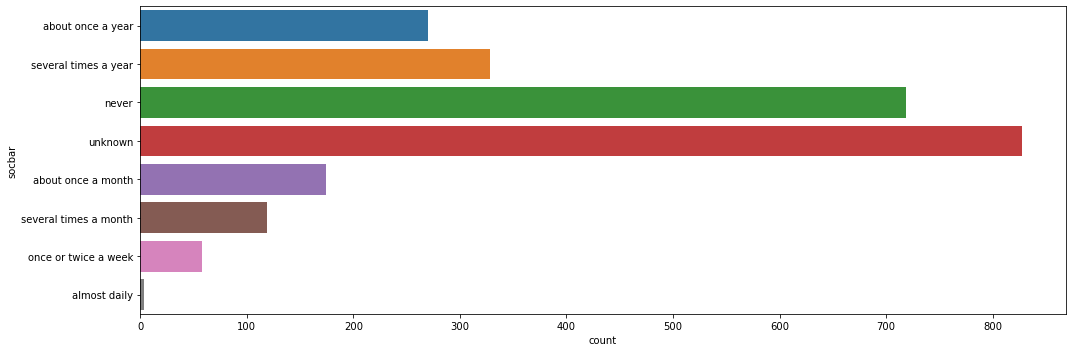

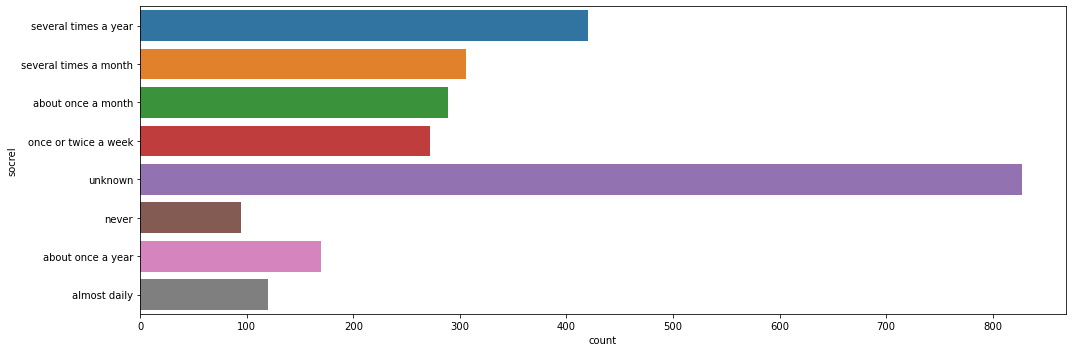

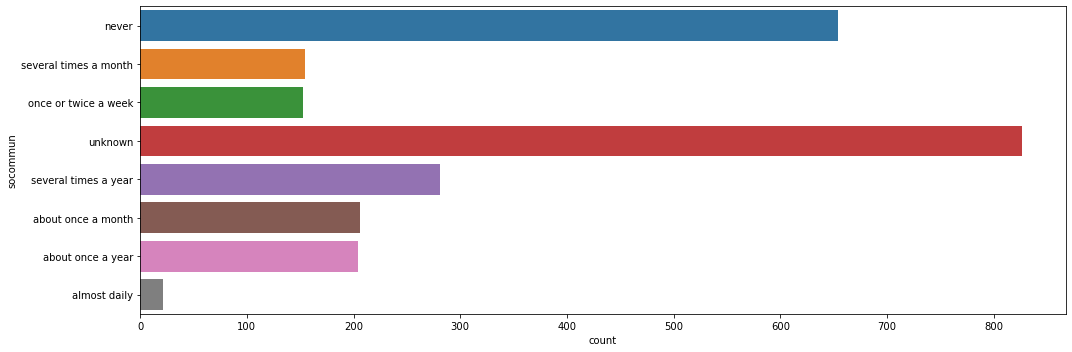

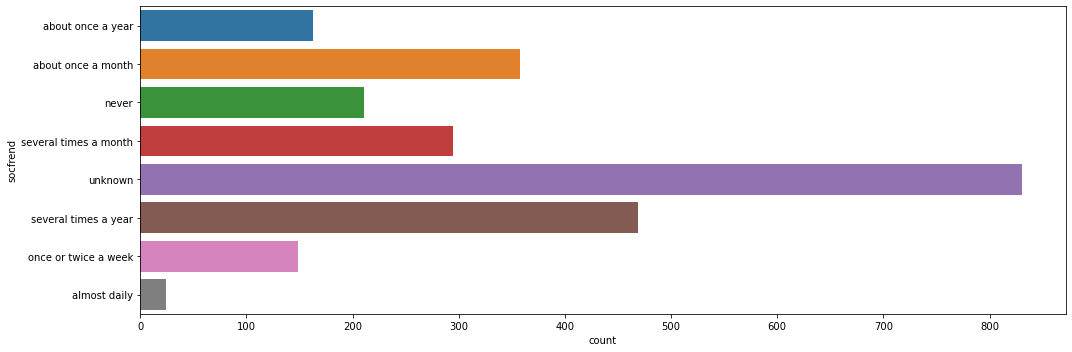

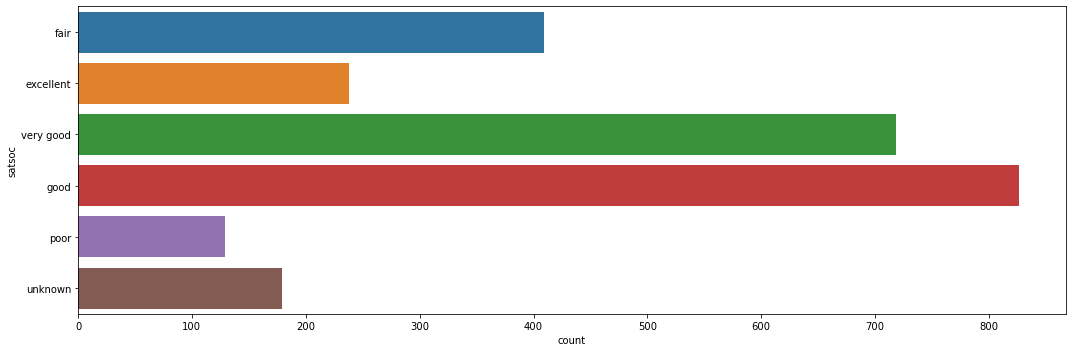

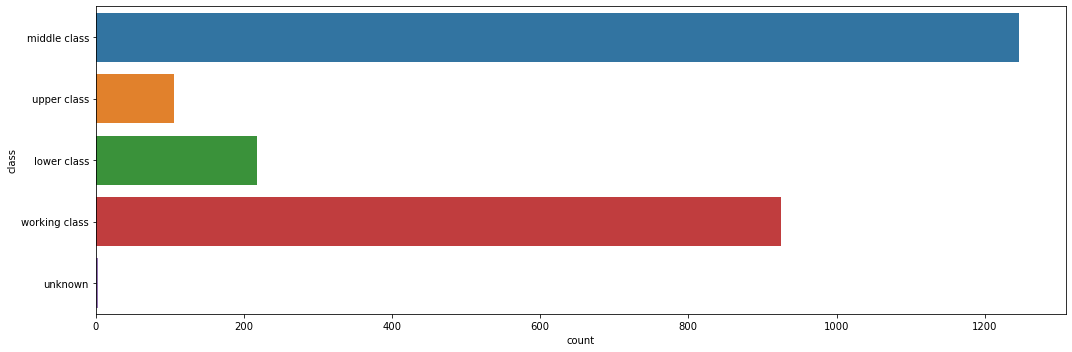

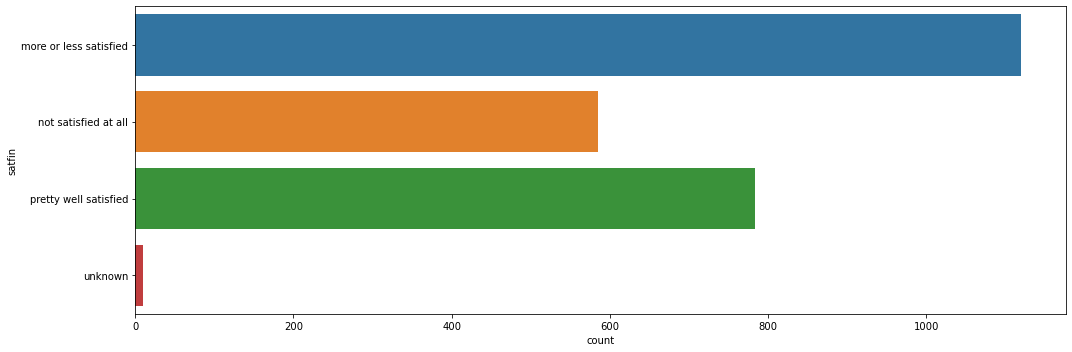

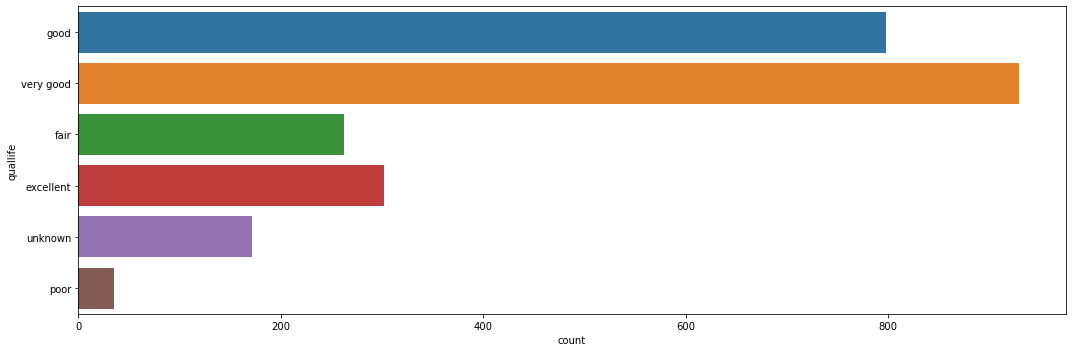

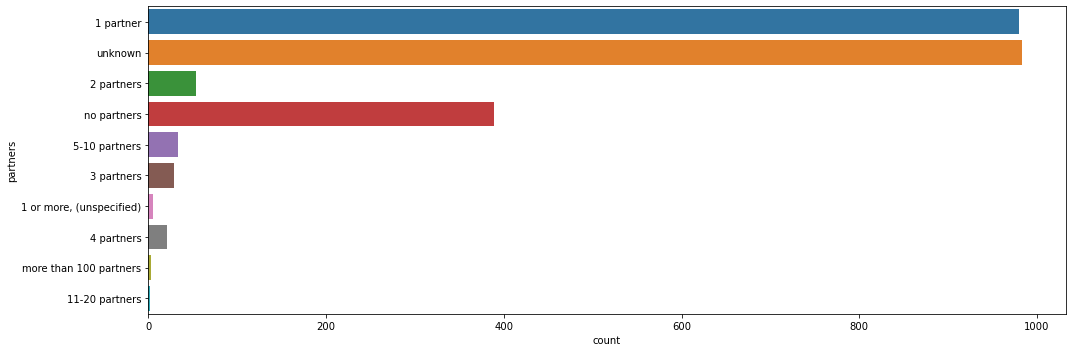

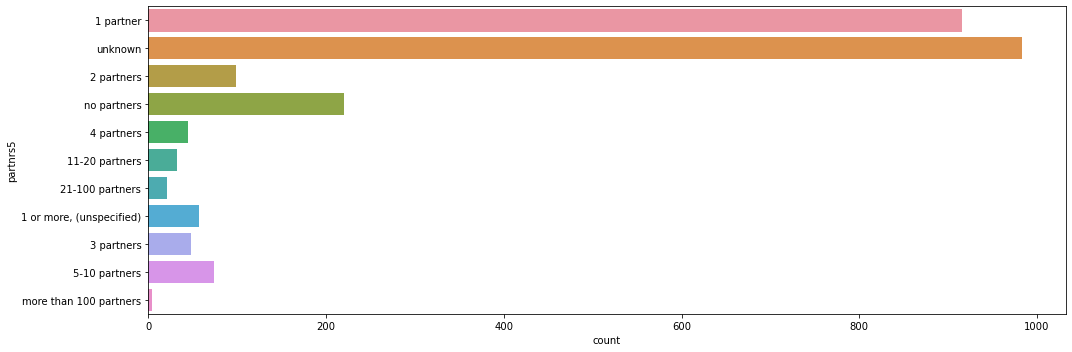

In [42]:
variable_count(train)

### TAKEAWAYS:
- I'll try moving towards MVP but I think that at least figuring out how to bin age groups, and maybe pull some float in might help the EDA process

TypeError: Neither the `x` nor `y` variable appears to be numeric.

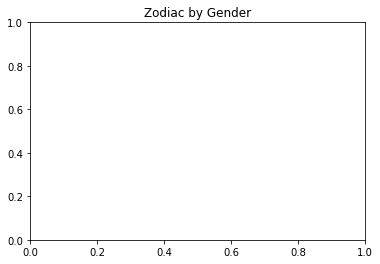

In [44]:
plt.title("Zodiac by Gender")
sns.barplot(x="sex", y="zodiac", data=train)
plt.legend()
plt.show()
#i need to encode some of my data::::